#### Описание исследования

В данном исследовании проводится маркетинговый анализ затрат на рекламу развлекательного приложения Procrastinate Pro+
основанный на данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года.<br>
дата исследования: 1 ноября 2019 года

#### Цель исследования

Определить причины убытков развлекательного приложения Procrastinate Pro+.<br>
Дать рекомендации отделу маркетинга по корректировке финансирования рекламных кампаний

#### Описание данных
Таблица visits_log_short:
- User Id — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Session start — дата и время начала сессии
- Session End — дата и время окончания сессии
- Channel — идентификатор рекламного источника, из которого пришел пользователь
- Region - страна пользователя

Таблица orders_log_short:

- User Id — уникальный id пользователя, который сделал заказ
- Event Dt — дата и время покупки
- Revenue — выручка

Таблица costs_short:

- Channel — идентификатор рекламного источника
- Dt — дата
- Costs — затраты на этот рекламный источник в этот день

#### Импорт библиотек и загрузка данных:

In [47]:
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### Просмотр и предобработка данных

In [48]:
display(visits.head(5))
display(orders.head(5))
display(costs.head(5))

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


изменим формат записи названий столбцов(строчные буквы через подчеркивание)

In [49]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns]

In [50]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Столбцы с датами имеют формат object.
Переводем даты в формат datetime.

In [51]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Проверка на пропуски

In [52]:
display(visits.isna().sum())
display(orders.isna().sum())
display(costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

пропусков нет

проверка на дубликаты

In [53]:
display(visits.duplicated().sum())
display(orders.duplicated().sum())
display(costs.duplicated().sum())

0

0

0

Проверка на аномальные значения

In [54]:
display(visits.region.value_counts())
display(visits.device.value_counts())
display(visits.channel.value_counts())
display(costs.channel.value_counts())

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

LeapBob               180
MediaTornado          180
AdNonSense            180
YRabbit               180
WahooNetBanner        180
FaceBoom              180
TipTop                180
RocketSuperAds        180
lambdaMediaAds        180
OppleCreativeMedia    180
Name: channel, dtype: int64

In [55]:
display(visits.describe())
display(orders.describe())
display(costs.describe())

,user_id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


#### Выводы по предобработке

Выполнена проверка данных, формат столбцов с датами переведен в datetime.<br>
Изменен формат записи названий столбцов(строчные буквы через подчеркивание)<br>
Дубликатов, пропусков и аномальных значений нет

### функции для расчёта и анализа LTV, ROI, удержания и конверсии.



- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.


- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Зададим функции для вычисления метрик(из теории)

In [56]:
# функция создания профилей
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [57]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [58]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [59]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [60]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [61]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [62]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [63]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()  

### Исследовательский анализ данных



#### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [64]:
profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [65]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ignore_horizon = False

In [66]:
min_analysis_date = costs['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [67]:
max_analysis_date= observation_date - timedelta(days=horizon_days - 1)
max_analysis_date

datetime.date(2019, 10, 19)

сформированы профили пользователей, минимальная дата привлечения 1.5.2019 максимальная 19.10.2019

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [68]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})

user_id payer          
              nunique   sum      mean
region                               
France          17450   663  0.037994
Germany         14981   616  0.041119
UK              17575   700  0.039829
United States  100002  6902  0.069019

Пользователи приходят в приложение из 4 стран: Франция, Германия, Великобритания, США.<br>
Больше всего платящих пользователей прирходится на США(6902).<br>
Доля платящих пользователей для США составляет 7%.

#### Какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [69]:
device = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
device['share'] = round(device.payer / device.user_id, 2)
device

,user_id,payer,share
device,,,
iPhone,54479,3382,0.06
Android,35032,2050,0.06
Mac,30042,1912,0.06
PC,30455,1537,0.05


Клиенты пользуются: iPhone, Android, Mac и PC.<br>
Большинство пользователей предпочитают iPhone.<br>
Доля платящих пользователей одинаоква для iPhone, Android, Mac и равна 6 процентов для каждого устройства.<br>
Меньще всего плаятщих пользователей устройства PC

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [70]:
channel = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'sum'}).sort_values(by='payer', ascending=False)
channel['share'] = round(channel.payer / channel.user_id, 2)
channel

,user_id,payer,share
channel,,,
FaceBoom,29144,3557,0.12
TipTop,19561,1878,0.10
organic,56439,1160,0.02
WahooNetBanner,8553,453,0.05
AdNonSense,3880,440,0.11
RocketSuperAds,4448,352,0.08
LeapBob,8553,262,0.03
OppleCreativeMedia,8605,233,0.03
lambdaMediaAds,2149,225,0.10


Количество рекламных источников привлечения - 10.<br> 
Больше всего платящих пользователей пришло из FaceBoom(3557) и TipTop(1878).<br>
Число платящих пользователей пришедших без рекламы - 1160<br>
ТОП 4 рекламных источников источников по доле платящих пользователей:<br>
FaceBoom - 12%<br>
AdNonSense - 11%<br>
TipTop - 10%<br>
lambdaMediaAds - 10%.<br>

### Маркетинг



#### Посчитаем общую сумму расходов на маркетинг.

In [71]:
round(costs.costs.sum(), 2)

105497.3

Общая сумма расходов на маркетинг составила 105497.3

#### Сколько денег потратили на каждый источник.

In [72]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Наибольше наибольшие рекламные расходы приходятся на TipTop(54751.30) и FaceBoom(32445.60).<br>
Расходы на остальные источники в несколько раз меньше.

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. 

In [73]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

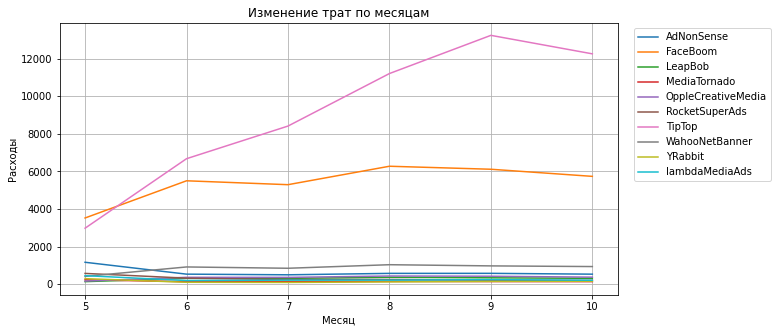

In [74]:
costs.pivot_table(
    index='month',   
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(10, 5), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

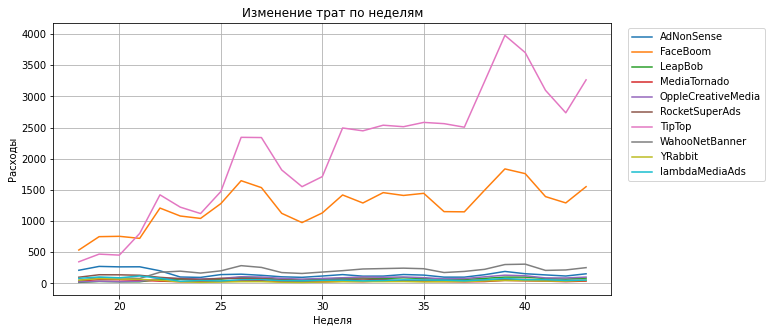

In [75]:
costs.pivot_table(
    index='week',   
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(10, 5), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Траты на исотнчик на TipTop росли с мая по сентябрь.<br>
Траты на исотнчик на TipTop росли с мая по июнь.<br>
Траты на остальные источники распределены равномерно по времени.

#### Сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. 

In [76]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)
max_acquitision_dt = ltv_raw['dt'].max()
ltv_profiles = profiles.query('dt <= @max_acquitision_dt')
ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

,user_id
dt,
2019-05-01,909
2019-05-02,758
2019-05-03,849
2019-05-04,1015
2019-05-05,970
...,...
2019-10-15,674
2019-10-16,656
2019-10-17,703


In [77]:
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)
round(cac, 2)

,cac
channel,
AdNonSense,1.01
FaceBoom,1.11
LeapBob,0.21
MediaTornado,0.22
OppleCreativeMedia,0.25
RocketSuperAds,0.42
TipTop,2.76
WahooNetBanner,0.60
YRabbit,0.22


In [78]:
cac_total = (ltv_profiles.agg({'acquisition_cost': 'mean'}))
round(cac_total, 2)

acquisition_cost    0.69
dtype: float64

средний САС для всего проекта в целом составляет 0,69

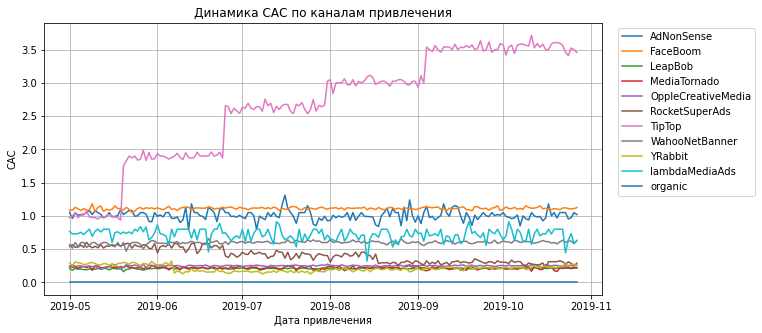

In [79]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Средний CAC для TipTop составляет 2,76, для FaceBoom 1,11, для AdNonSense 1,01.<br> 
средний САС для всего проекта в целом составляет 0,69<br> 
Стоимость привлечения пользователся для TipTop росло скачкообразно в течение всего рассматриваемого периода.<br>
Стоимость привлечения пользователся для других источников держалось на одном уровне.

### Оценка окупаемости рекламы


In [80]:
profiles = profiles.query('channel != "organic"')

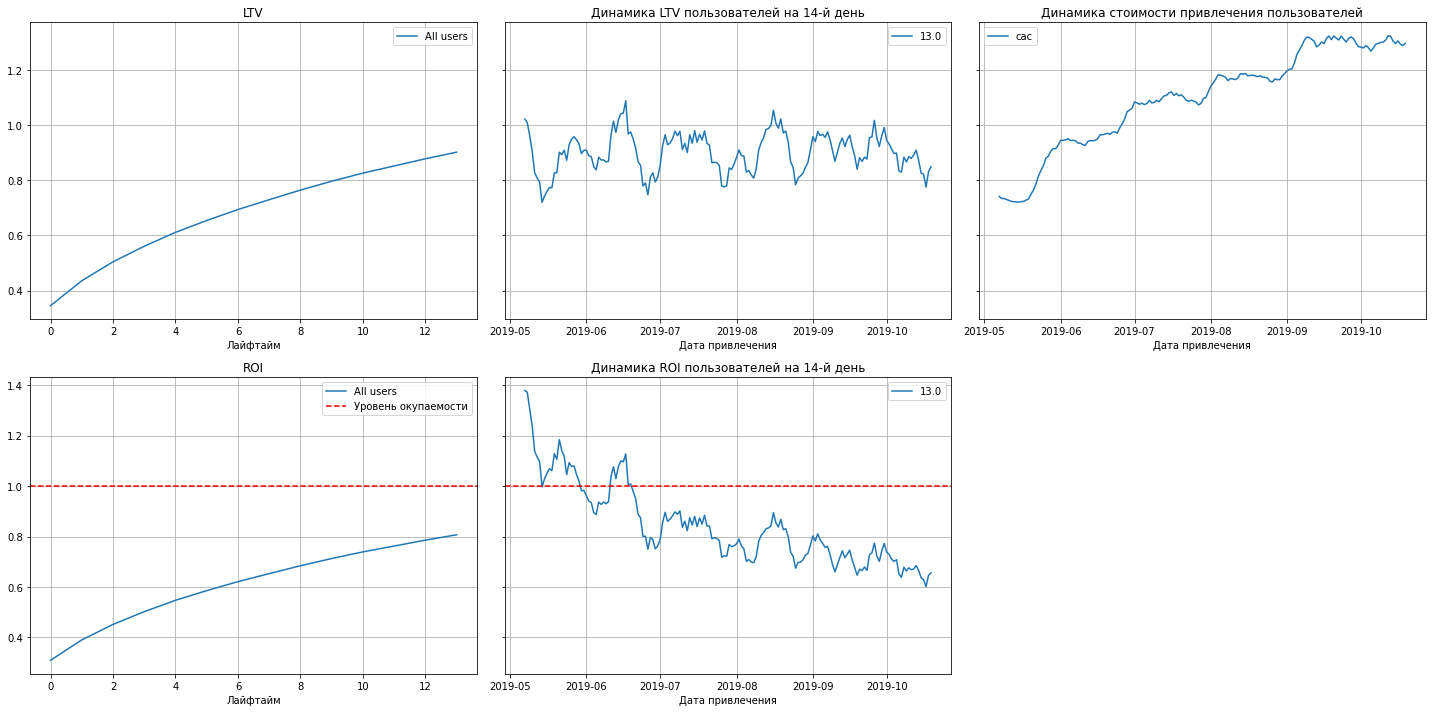

In [81]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

В целом реклама не окупается.
ROI находится ниже уровня окупаемости. 
Динамика ROI пользователей на 14-й день падала со временем.
Динамика стоимости привлечения пользователей увеличивалась со временем.

#### Конверсия пользователей и динамика её изменения, удержание пользователей. 

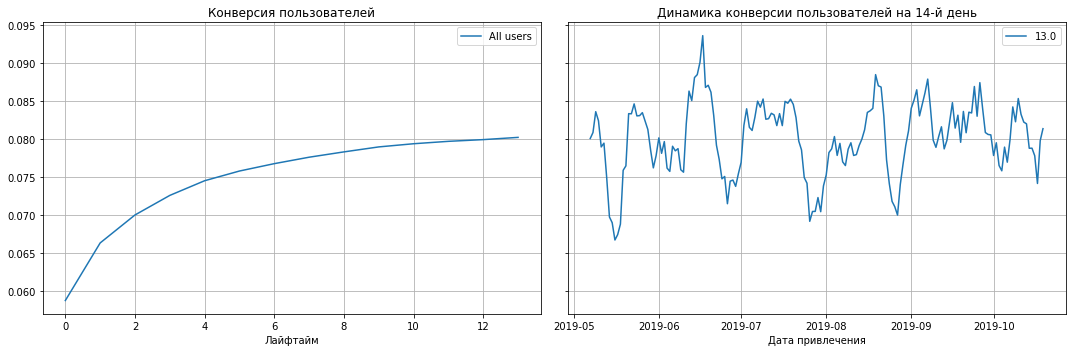

In [82]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

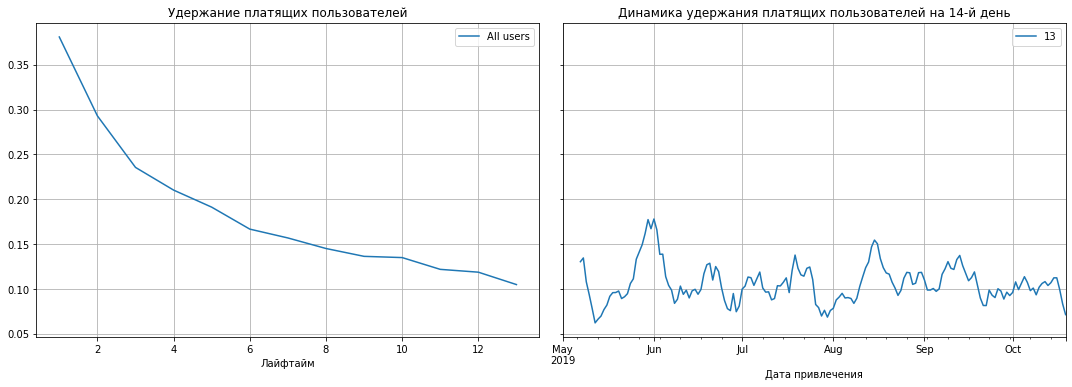

In [83]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

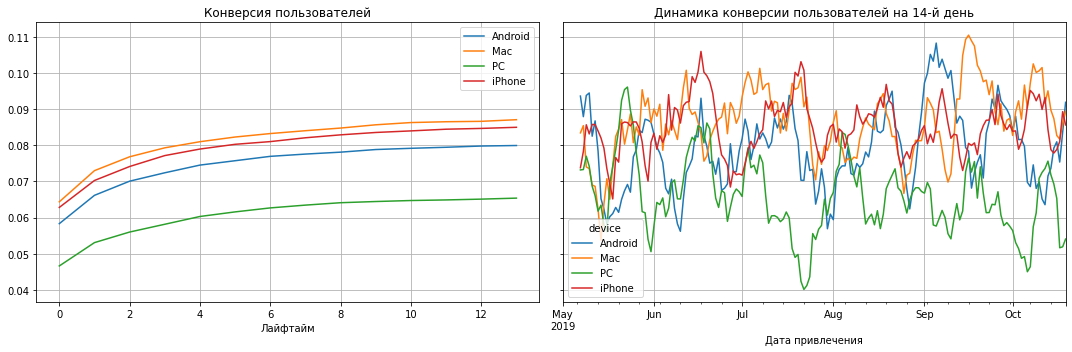

In [84]:
dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

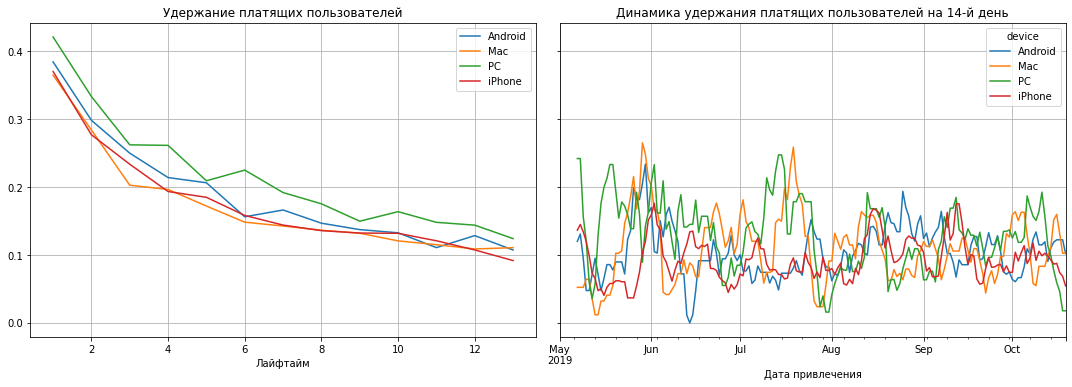

In [85]:
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

пользователи Mac и iPhone имеют лучшую конверсию среди устройств.
пользователи PC имеет имеют лучшее удержание платящих пользователей.

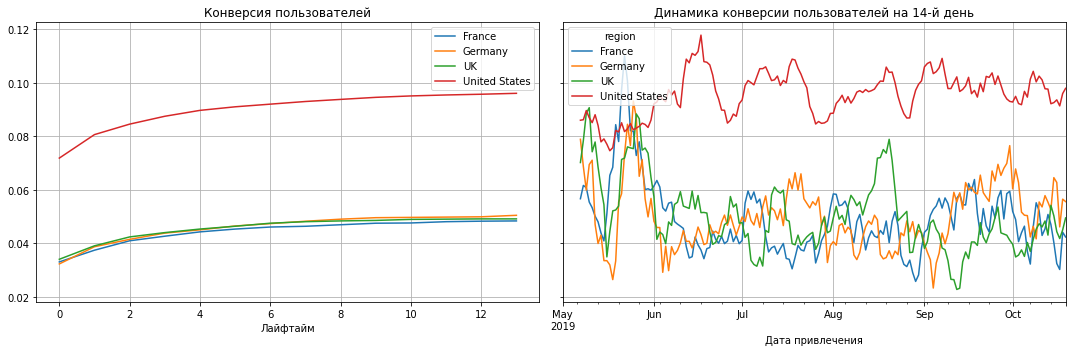

In [86]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

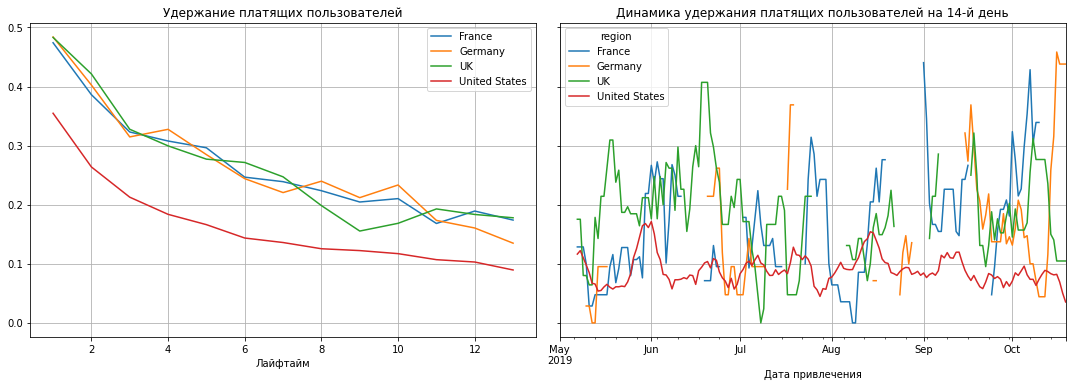

In [87]:
dimensions = ['region']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

пользователи из США имеют конверсию в 2 раза больше, по сравнению с другими странами.
при этом удержание пользователей из США примерно в 1,5 ниже, по сравнению с другими странами.

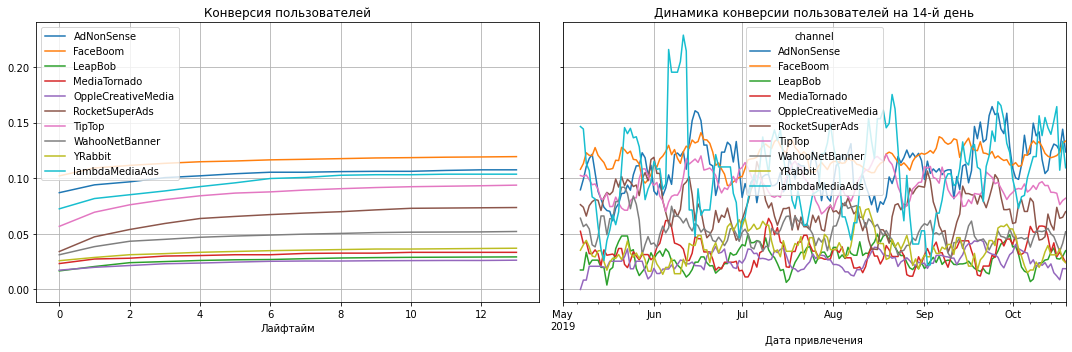

In [88]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

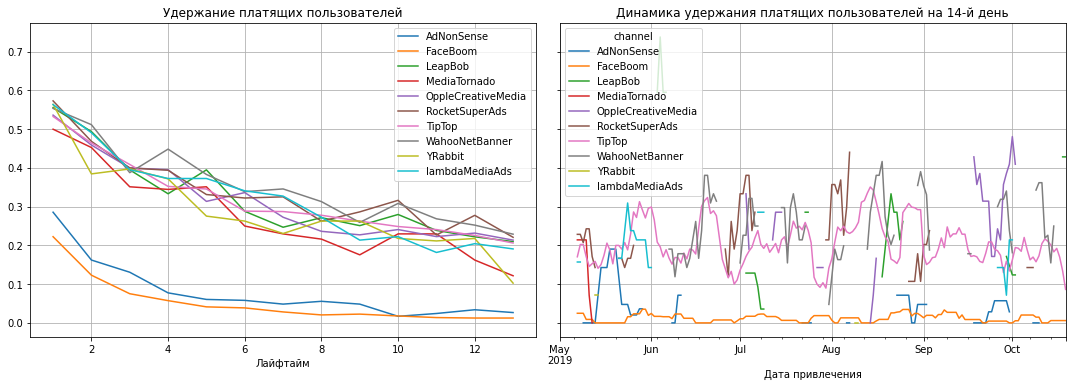

In [89]:
dimensions = ['channel']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

пользоватеи из FaceBoom AdNonSense, lambdaMediaAds, TipTop имеют самую болбшую конверсию.
при этом показатели по удержанию для пользователей FaceBoom и lambdaMediaAds примерно в 3 раза, чем для остальных

#### Окупаемость рекламы с разбивкой по устройствам. графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

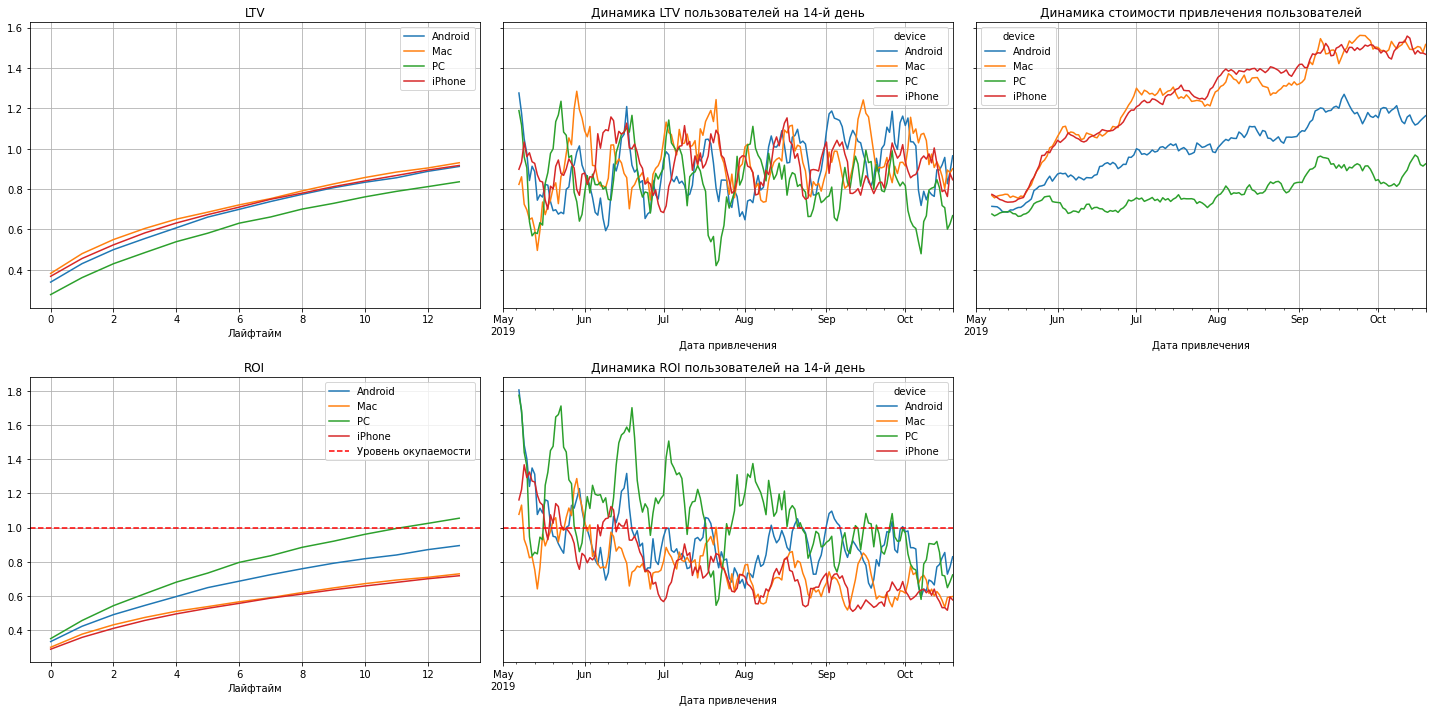

In [90]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Окупились только пользователи PC,при этом их динамика стоимости привлечения пользователей ниже чем у остальных.
Динамика ROI показывает лавное снижение на протяжение времени

#### Окупаемость рекламы с разбивкой по странам. 

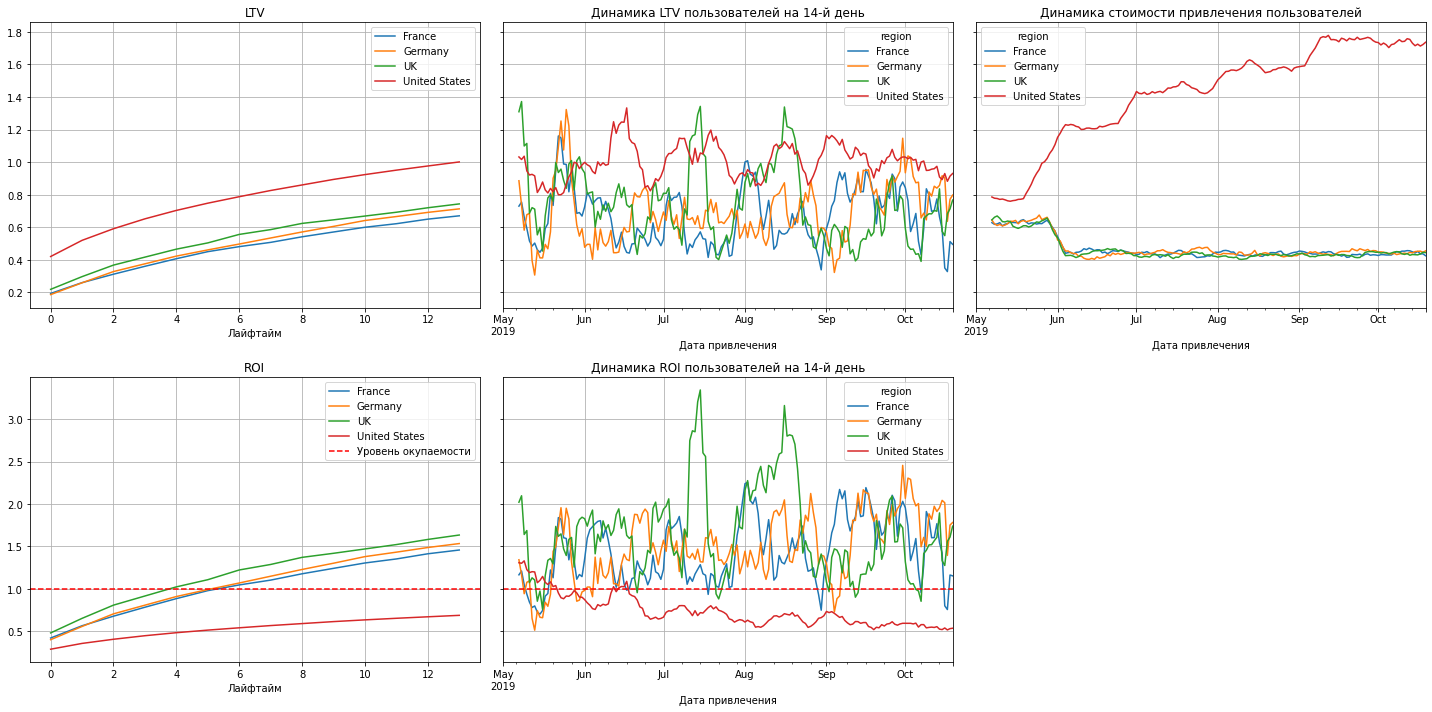

In [91]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупилась только в США.
Динамика стоимости привлечения пользователей в США намного больше по сравнению с другими странами.
LTV в США выше чем в других странах.
причины низкой окупаемости в США вызваны высокой стоимостью рекламы

#### Окупаемость рекламы с разбивкой по рекламным каналам. П

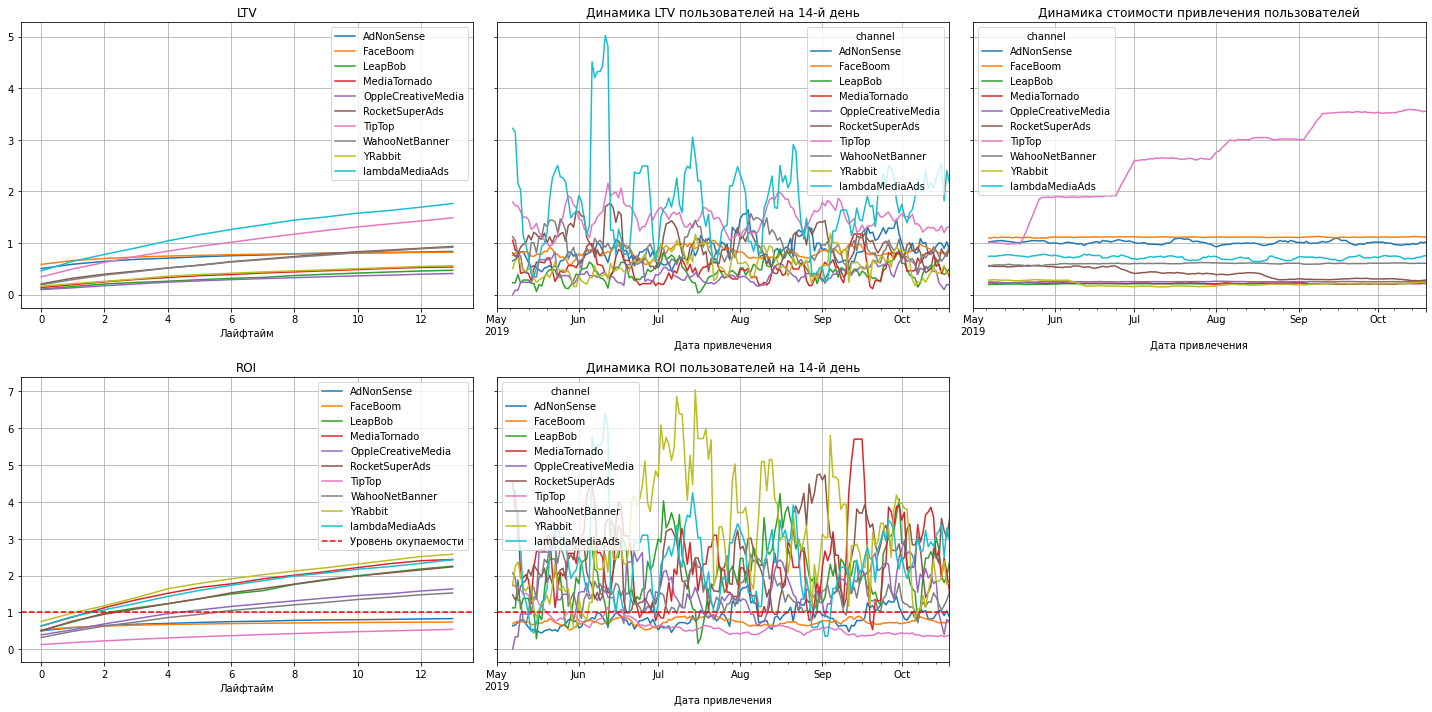

In [92]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Не окупались 3 источника: FaceBoom, TipTop и AdNonSense
Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop.

#### Вывод

В рассматриваемый период реклама не окупилась.<br>
ROI находится ниже уровня окупаемости.<br>
Динамика ROI пользователей на 14-й день падала со временем.<br>
Динамика стоимости привлечения пользователей увеличивалась со временем.<br>

пользователи PC имеет имеют лучшее удержание платящих пользователей.<br>
пользователи из США имеют конверсию в 2 раза больше, по сравнению с другими странами.<br>
при этом удержание пользователей из США примерно в 1,5 ниже, по сравнению с другими странами.<br>

пользоватеи из FaceBoom AdNonSense, lambdaMediaAds, TipTop имеют самую болбшую конверсию.<br>
при этом показатели по удержанию для пользователей FaceBoom и lambdaMediaAds примерно в 3 раза, чем для остальных<br>

Окупились только пользователи PC,при этом их динамика стоимости привлечения пользователей ниже чем у остальных.<br>

Реклама не окупилась только в США.<br>
Динамика стоимости привлечения пользователей в США намного больше по сравнению с другими странами.<br>
Причины низкой окупаемости в США вызваны высокой стоимостью рекламы.<br>

Не окупались 3 источника: FaceBoom, TipTop и AdNonSense<br>
Динамика стоимости привлечения пользователей наиболее высокая у канала TipTop.<br>

Негативное влияние на окупаемость оказывают:<br>
расходы на рекламу в США, расходы на рекламу для mac и iphone, расходы на источник TipTop и FaceBoom.<br>
Проблемы окупаемости вызваны высокой стоимостью привлечения клиента для самых многочисленных категорий.

### Общие выводы


Был выполнен анализ окупаемости развлекательного приложения Procrastinate Pro+, в ходе которого сделаны выводы:<br>
Больше всего платящих пользователей прирходится на США(6902).<br>
Доля платящих пользователей для США составляет 7%.<br>
Наибольше наибольшие рекламные расходы приходятся на TipTop(54751.30) и FaceBoom(32445.60).<br> 
Расходы на остальные источники в несколько раз меньше.<br>
Клиенты пользуются: iPhone, Android, Mac и PC.<br>
Большинство пользователей предпочитают iPhone.<br>
Доля платящих пользователей одинаоква для iPhone, Android, Mac и равна 6 процентов для каждого устройства.<br>
Меньще всего плаятщих пользователей устройства PC<br>
Окупились только пользователи PC<br>
не окупаились только пользователи США<br>

В рассматриваемый период реклама не окупилась.<br>
Проблемы окупаемости вызваны высокой стоимостью привлечения клиента для самых многочисленных категорий<br>

Негативное влияние на окупаемость оказывают:<br>
расходы на рекламу в США, расходы на рекламу для mac и iphone, расходы на источник TipTop и FaceBoom.<br>

Рекомендуется сократить финансирование там, где стоимость привлечения слишком большая:<br>
расходы на рекламу в США,<br>
расходы на рекламу для mac и iphone,<br>
расходы на источник TipTop и FaceBoom.<br>

А также повысить расходы на рекламу для пользователей PC.